In [121]:
import io
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from random import randrange
from google.colab import files

# Train Dataset

In [122]:
uploaded = files.upload()
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

Saving train.csv to train (2).csv


In [123]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# We see a lot of NaN values in the Cabin column. Hence we begin by counting the NaN values for each column and run the describe() function to better understand the data.

In [124]:
for col in train.columns:
  print(col, train[col].isna().sum())

PassengerId 0
Survived 0
Pclass 0
Name 0
Sex 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [125]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Age has 177 and Cabin has 687 NaN/Null values, this could affect our model. We need to figure out ho these columns are correlated with the other columns. This would help replacing the NaN values. 

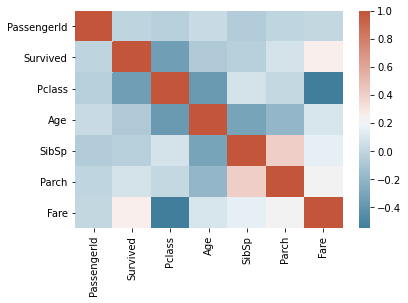

In [126]:
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap = sns.diverging_palette(230, 20, as_cmap=True))

In [127]:
train = train[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

Was trying to find missing values for Cabin so that level could be calculated. Level is important as level A means a person was on the top most deck making it easy to evacuate as compared to the person at level G. But I let it go as I ended up spending way too much time on it.

In [128]:
# print(train['Cabin'].unique())
# train[['Pclass','Ticket','SibSp','Parch','Fare','Cabin']].iloc[:20]
# train['Level'] = train['Cabin'].astype(str).str[0]

In [129]:
# train[['Cabin','Level']]
# train.groupby(['Parch','SibSp'])['PassengerId'].nunique()

In [130]:
# train.groupby(['Level','Pclass','SibSp'])['PassengerId'].nunique()

In [131]:
# train.groupby(['Embarked','Level','Pclass'])['PassengerId'].nunique()

No one who boarded from Q got into A,B,D,G,T

Continued....

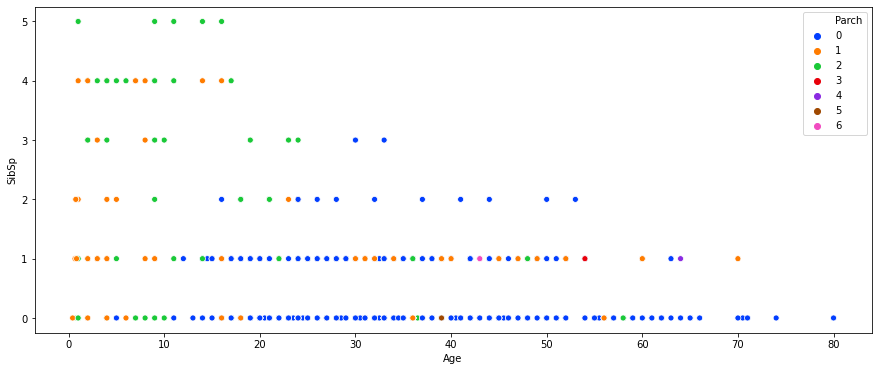

In [132]:
plt.figure(figsize=(15,6))
sns.scatterplot(train['Age'], train['SibSp'], hue=train['Parch'], palette='bright')

In [133]:
# plt.figure(figsize=(15,6)) 
# sns.scatterplot(train['Age'], train['Parch'], hue=train['SibSp'], palette='dark')

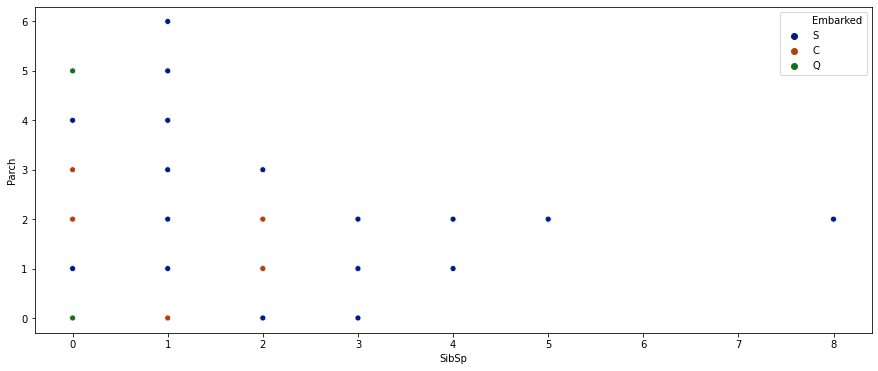

In [134]:
plt.figure(figsize=(15,6)) 
sns.scatterplot(train['SibSp'], train['Parch'], hue=train['Embarked'], palette='dark')

In [135]:
for row in train.itertuples():
  if row.SibSp==8:
    print(row)

Pandas(Index=159, PassengerId=160, Survived=0, Pclass=3, Sex='male', Age=nan, SibSp=8, Parch=2, Fare=69.55, Embarked='S')
Pandas(Index=180, PassengerId=181, Survived=0, Pclass=3, Sex='female', Age=nan, SibSp=8, Parch=2, Fare=69.55, Embarked='S')
Pandas(Index=201, PassengerId=202, Survived=0, Pclass=3, Sex='male', Age=nan, SibSp=8, Parch=2, Fare=69.55, Embarked='S')
Pandas(Index=324, PassengerId=325, Survived=0, Pclass=3, Sex='male', Age=nan, SibSp=8, Parch=2, Fare=69.55, Embarked='S')
Pandas(Index=792, PassengerId=793, Survived=0, Pclass=3, Sex='female', Age=nan, SibSp=8, Parch=2, Fare=69.55, Embarked='S')
Pandas(Index=846, PassengerId=847, Survived=0, Pclass=3, Sex='male', Age=nan, SibSp=8, Parch=2, Fare=69.55, Embarked='S')
Pandas(Index=863, PassengerId=864, Survived=0, Pclass=3, Sex='female', Age=nan, SibSp=8, Parch=2, Fare=69.55, Embarked='S')


The SibSp of 8 seems highly skewed and only 7 people have that value. And they all have the same last name. So it could be that either the SibSp should have been 7 or that there is data missing for one person. Since their Age and Cabin information is missing and 7 people account for just 0.7% of teh total dataset it is safe to drop these values.  

In [136]:
train = train[train.SibSp != 8]
train['Embarked']=train['Embarked'].fillna('S')         # 'S' as majority of the people boarded from there

In [137]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  884 non-null    int64  
 1   Survived     884 non-null    int64  
 2   Pclass       884 non-null    int64  
 3   Sex          884 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        884 non-null    int64  
 6   Parch        884 non-null    int64  
 7   Fare         884 non-null    float64
 8   Embarked     884 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.1+ KB


In [138]:
def SIBSP0(row,train0):
  if row.SibSp==0 and 0<row.Parch<3:
      train0.at[row.Index, 'Age'] = randrange(10)*1.0
  elif row.SibSp==0 and row.Parch==0:
      train0.at[row.Index, 'Age'] = randrange(20,60)*1.0   
  return train0

In [139]:
def SIBSP1(row,train1):
  if row.SibSp==1 and row.Parch==0:
      train1.at[row.Index, 'Age'] = randrange(10,50)*1.0
  elif row.SibSp==1 and row.Parch==1:
      train1.at[row.Index, 'Age'] = randrange(50)*1.0  
  elif row.SibSp==1 and row.Parch==2:
      train1.at[row.Index, 'Age'] = randrange(5,15)*1.0
  return train1

In [140]:
def SIBSP2(row,train2):
  if row.SibSp==2 and row.Parch==0:
      train2.at[row.Index, 'Age'] = randrange(20,50)*1.0
  elif row.SibSp==2 and row.Parch==1:
      train2.at[row.Index, 'Age'] = randrange(10)*1.0  
  elif row.SibSp==2 and row.Parch==2:
      train2.at[row.Index, 'Age'] = randrange(16,22)*1.0
  return train2

In [141]:
def SIBSP3(row,train3):
  if row.SibSp==3 and row.Parch==0:
      train3.at[row.Index, 'Age'] = randrange(30,35)*1.0
  elif row.SibSp==3 and row.Parch==1:
      train3.at[row.Index, 'Age'] = randrange(10)*1.0  
  elif row.SibSp==3 and row.Parch==2:
      train3.at[row.Index, 'Age'] = randrange(25)*1.0
  return train3

In [142]:
for row in train.itertuples():
  if row.Age.is_integer()==False:
    train=SIBSP0(row,train)
    train=SIBSP1(row,train)
    train=SIBSP2(row,train)
    train=SIBSP3(row,train)

Now there should be no null values in the Age column.

In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  884 non-null    int64  
 1   Survived     884 non-null    int64  
 2   Pclass       884 non-null    int64  
 3   Sex          884 non-null    object 
 4   Age          884 non-null    float64
 5   SibSp        884 non-null    int64  
 6   Parch        884 non-null    int64  
 7   Fare         884 non-null    float64
 8   Embarked     884 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 109.1+ KB


# Test Dataset

In [144]:
uploaded = files.upload()
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))

Saving test.csv to test (2).csv


In [145]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [146]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Same as Train dataset, there are a large number of values missing from the Age and Cabin Columns so we are going to follow the same approach, find the correaltion between Age and other columns in order to find the missing values and drop the Name, Ticket and Cabin columns. 

In [147]:
test = test.drop(columns=['Name','Ticket','Cabin'])
print(test.head())

   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0          892       3    male  34.5      0      0   7.8292        Q
1          893       3  female  47.0      1      0   7.0000        S
2          894       2    male  62.0      0      0   9.6875        Q
3          895       3    male  27.0      0      0   8.6625        S
4          896       3  female  22.0      1      1  12.2875        S


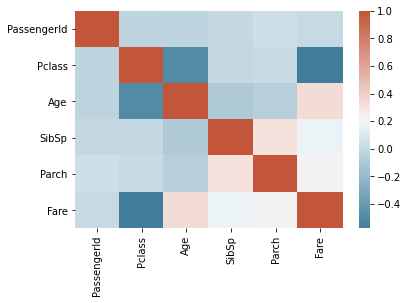

In [148]:
corr = test.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap = sns.diverging_palette(230, 20, as_cmap=True))

In [149]:
print(test.SibSp.unique())
print(test.Parch.unique())
test.loc[test.Parch==9]

[0 1 2 3 4 5 8]
[0 1 3 2 4 6 5 9]


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
342,1234,3,male,NaN,1,9,69.55,S
365,1257,3,female,NaN,1,9,69.55,S


Since there is no way for us to approximate their age we are going to drop these two values.

In [150]:
test = test[test.Parch != 9]

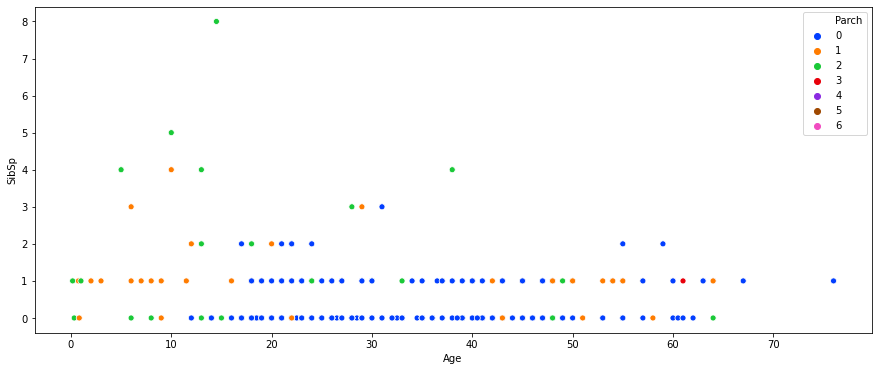

In [151]:
plt.figure(figsize=(15,6))
sns.scatterplot(test['Age'], test['SibSp'], hue=test['Parch'], palette='bright')

In [152]:
def PARCH0(row,test0):
  if row.Parch==0 and row.SibSp==0:
      test0.at[row.Index, 'Age'] = randrange(10,65)*1.0
  elif row.Parch==0 and row.SibSp==1:
      test0.at[row.Index, 'Age'] = randrange(20,50)*1.0  
  elif row.Parch==0 and row.SibSp==2:
      test0.at[row.Index, 'Age'] = randrange(15,25)*1.0  
  elif row.Parch==0 and row.SibSp==3:
      test0.at[row.Index, 'Age'] = randrange(30,35)*1.0
  elif row.Parch==4 and row.SibSp==0:                           # Only one value for Parch = 4 and SibSp = 0 
      test0.at[row.Index, 'Age'] = 60*1.0
  return test0

In [153]:
def PARCH1(row,test1):
  if row.Parch==1 and row.SibSp==0:
      test1.at[row.Index, 'Age'] = randrange(40,60)*1.0
  elif row.Parch==1 and row.SibSp==1:
      test1.at[row.Index, 'Age'] = randrange(20)*1.0  
  elif row.Parch==1 and row.SibSp==2:
      test1.at[row.Index, 'Age'] = randrange(10,20)*1.0  
  elif row.Parch==1 and row.SibSp==3:
      test1.at[row.Index, 'Age'] = randrange(15,30)*1.0  
  elif row.Parch==1 and row.SibSp==4:
      test1.at[row.Index, 'Age'] = randrange(5,15)*1.0
  return test1

In [154]:
def PARCH2(row,test2):
  if row.Parch==2 and row.SibSp==0:
      test2.at[row.Index, 'Age'] = randrange(15)*1.0
  elif row.Parch==2 and row.SibSp==1:
      test2.at[row.Index, 'Age'] = randrange(3)*1.0  
  elif row.Parch==2 and row.SibSp==2:
      test2.at[row.Index, 'Age'] = randrange(10,20)*1.0  
  elif row.Parch==2 and row.SibSp==3:
      test2.at[row.Index, 'Age'] = randrange(25,30)*1.0  
  elif row.Parch==2 and row.SibSp==4:
      test2.at[row.Index, 'Age'] = randrange(5,15)*1.0  
  elif row.Parch==2 and row.SibSp==5:
      test2.at[row.Index, 'Age'] = randrange(5,15)*1.0  
  elif row.Parch==2 and row.SibSp==8:
      test2.at[row.Index, 'Age'] = randrange(10,20)*1.0
  return test2

In [155]:
for row in test.itertuples():
  if row.Age.is_integer()==False:
    test=PARCH0(row,test)
    test=PARCH1(row,test)
    test=PARCH2(row,test)

In [156]:
test.Age.loc[test.Parch].isna().sum()

0

In [157]:
test['Fare']=test['Fare'].fillna(0)

In [158]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  416 non-null    int64  
 1   Pclass       416 non-null    int64  
 2   Sex          416 non-null    object 
 3   Age          416 non-null    float64
 4   SibSp        416 non-null    int64  
 5   Parch        416 non-null    int64  
 6   Fare         416 non-null    float64
 7   Embarked     416 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 49.2+ KB


# create the Logistic Regression Model 
# drop Passengerid column


# Logistic Regression Model

In [159]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# Feature Engineering 

In [160]:
# Converting Sex and Embarked columns to numeric and dropping PasssengerId column
train['Sex']=train['Sex'].replace(['female','male'], [1,0])
test['Sex']=test['Sex'].replace(['female','male'], [1,0])
train['Embarked']=train['Embarked'].replace(['S','C','Q'],[0,1,2])
test['Embarked']=test['Embarked'].replace(['S','C','Q'],[0,1,2])

### For passengers with 0 SibSp and 0 Parch values means that they were traveling alone hence this is something we could add as a feature to if it has any impact on out model.

In [161]:
solo_travelertest = list()
for row in test.itertuples():
  if row.Parch==0 and row.SibSp==0:
    solo_travelertest.append(1)                     # 1 meaning that the passenger is a lone traveler and 0 means they have company
  else:
    solo_travelertest.append(0)

In [162]:
test['solo_traveler']=solo_travelertest
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,solo_traveler
0,892,3,0,22.0,0,0,7.8292,2,1
1,893,3,1,47.0,1,0,7.0000,0,0
2,894,2,0,62.0,0,0,9.6875,2,1
3,895,3,0,27.0,0,0,8.6625,0,1
4,896,3,1,22.0,1,1,12.2875,0,0


In [163]:
solo_travelertrain = list()
for row in train.itertuples():
  if row.Parch==0 and row.SibSp==0:
    solo_travelertrain.append(1)                     # 1 meaning that the passenger is a lone traveler and 0 means they have company
  else:
    solo_travelertrain.append(0)

In [164]:
train['solo_traveler']=solo_travelertrain
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,solo_traveler
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,0
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,0
4,5,0,3,0,35.0,0,0,8.0500,0,1


In [165]:
# Lastly we drop the passengerid column from both test and train datasets
train=train.drop(columns='PassengerId')
test=test.drop(columns='PassengerId')

In [171]:
x_train = train.iloc[:, 1:]
y_train = train.iloc[:,0]

In [172]:
print(x_train.head())
print(y_train.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked  solo_traveler
0       3    0  22.0      1      0   7.2500         0              0
1       1    1  38.0      1      0  71.2833         1              0
2       3    1  26.0      0      0   7.9250         0              1
3       1    1  35.0      1      0  53.1000         0              0
4       3    0  35.0      0      0   8.0500         0              1
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [182]:
logisticRegr = LogisticRegression(C=2.0,max_iter=1500, solver='lbfgs' )

In [183]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=2.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
predictions = logisticRegr.predict(test)

In [185]:
test['Survived']=predictions

In [186]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,solo_traveler,Survived
0,3,0,22.0,0,0,7.8292,2,1,0
1,3,1,47.0,1,0,7.0000,0,0,0
2,2,0,62.0,0,0,9.6875,2,1,0
3,3,0,27.0,0,0,8.6625,0,1,0
4,3,1,22.0,1,1,12.2875,0,0,1


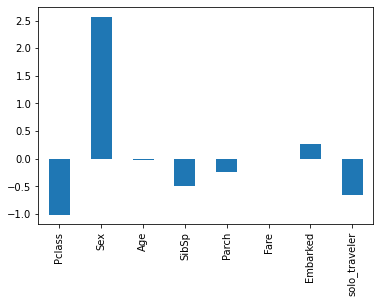

In [207]:
# get importance
importance=logisticRegr.coef_[0]
importance = pd.DataFrame(importance.reshape(1,-1),columns=x_train.columns)

# plot feature importance
row = importance.iloc[0]
row.plot(kind='bar',)
plt.show()